<a href="https://colab.research.google.com/github/PhantomBlade009/ISLR_LinReg_Solutions/blob/main/Carseats(Lab%20and%20Q10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab section here, question 10 solved below

In [ ]:
import pandas as pd 
import numpy as np  
from scipy import stats

In [ ]:
df =pd.read_csv('https://raw.githubusercontent.com/mscaudill/IntroStatLearn/master/data/Carseats.csv')

In [ ]:
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df.drop(columns=df.columns[0], inplace=True)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder  
ohe = OneHotEncoder(sparse=False)
oe = OrdinalEncoder()

In [ ]:
ShelveLoc_encoded = ohe.fit_transform(df['ShelveLoc'].values.reshape(-1,1))
US_encoded = oe.fit_transform(df['US'].values.reshape(-1,1))
Urban_encoded = oe.fit_transform(df['Urban'].values.reshape(-1,1))

In [ ]:
X = df.iloc[:, 1:df.shape[1]].drop(columns=['ShelveLoc', 'US', 'Urban']).values
X = np.column_stack((X,ShelveLoc_encoded,US_encoded, Urban_encoded))
y = df.iloc[:,0].values.reshape(-1,1)
print(X.shape, y.shape)

(400, 12) (400, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
X_norm = scaler.fit_transform(X) 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm,y, test_size = 0.3, random_state=4)

In [ ]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train) 
y_predict = lr.predict(X_test) 
lr.fit(X_norm, y)
y_predict_tot = lr.predict(X_norm)

In [ ]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
n= X.shape[0] 
p= X.shape[1]
adjusted_r2 = 1 - (1- r2_score(y_test, y_predict))*(n-1)*(1/(n-p-1))
print("RMSE Train = ", (mean_squared_error(y, y_predict_tot))**(1/2)) 
print("RMSE Test = ", (mean_squared_error(y_test, y_predict))**(1/2)) 
print("R2 Score = ", r2_score(y, y_predict_tot))  
print("Adjusted R2 Score = ", adjusted_r2)

RMSE Train =  1.0035356425291149
RMSE Test =  1.01908769009286
R2 Score =  0.8734133434127012
Adjusted R2 Score =  0.8798566232675059


In [ ]:
def summary(X, y, y_predict, lr):
  from scipy import stats 
  n = X.shape[0] 
  p = X.shape[1] 
  R2 = r2_score(y,y_predict) 
  adjusted_r2 = 1- (1-R2)*((n-1)/(n-p-1)) 
  RMSE = mean_squared_error(y,y_predict)**(1/2) 
  print("RMSE = ", RMSE) 
  print("R2 Score = ", R2)
  print("Adjusted R2 =" ,adjusted_r2) 

  weights = np.append(lr.intercept_,lr.coef_)

  #newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
  #MSE = (mean_squared_error(y, y_predict_tot))/(len(newX)-len(newX.columns))

  # Note if you don't want to use a DataFrame replace the two lines above with
  newX = np.append(np.ones((len(X),1)), X, axis=1)
  MSE = (sum((y-y_predict)**2))/(newX.shape[0]-newX.shape[1])


  var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
  sd_b = np.sqrt(var_b)
  ts_b = weights/ sd_b

  p_values =[2.0*(1.0-stats.t.cdf(np.abs(i),(newX.shape[0]-newX.shape[1]))) for i in ts_b]

  sd_b = np.round(sd_b,3)
  ts_b = np.round(ts_b,3)
  p_values = np.round(p_values,100)
  weights = np.round(weights,4)

  myDF3 = pd.DataFrame()
  myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [weights,sd_b,ts_b,p_values]
  print(myDF3)

  interval_95 = pd.DataFrame(np.column_stack((weights-2*sd_b, weights+2*sd_b)), columns=['LowerBound', 'UpperBound'])
  print('95 per intervals')
  print(interval_95)
  return

In [ ]:
summary(X,y,y_predict_tot,lr)

RMSE =  1.0035356425291149
R2 Score =  0.8734133434127012
Adjusted R2 = 0.8694881757665833
    Coefficients  Standard Errors  t values  Probabilities
0         7.4963              NaN       NaN            NaN
1         1.4215            0.004   342.281       0.000000
2         0.4417            0.002   239.083       0.000000
3         0.8176            0.011    73.406       0.000000
4         0.0306            0.000    82.489       0.000000
5        -2.2549            0.003  -843.115       0.000000
6        -0.7450            0.003  -233.852       0.000000
7        -0.0552            0.020    -2.797       0.005416
8        -0.9267              NaN       NaN            NaN
9         1.0965              NaN       NaN            NaN
10       -0.1060              NaN       NaN            NaN
11       -0.0881            0.150    -0.587       0.557457
12        0.0560            0.113     0.495       0.620594
95 per intervals
    LowerBound  UpperBound
0          NaN         NaN
1       1.41

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt


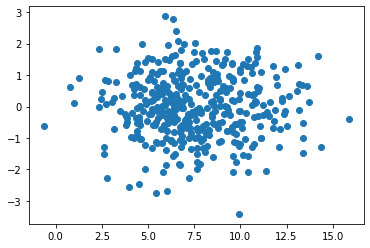

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_predict_tot, y_predict_tot-y)

#Questions from here:

In [ ]:
X = np.column_stack((df['Price'].values, US_encoded, Urban_encoded))
X = X.astype(np.float) 
y = df['Sales'].values.reshape(-1,1)
print(X.shape, y.shape)

(400, 3) (400, 1)


In [ ]:
lr.fit(X,y)
y_predict = lr.predict(X) 

In [ ]:
summary(X,y,y_predict,lr)

RMSE =  2.4600989164099034
R2 Score =  0.23927539218405547
Adjusted R2 = 0.23351232697332858
   Coefficients  Standard Errors  t values  Probabilities
0       13.0435            0.651    20.036       0.000000
1       -0.0545            0.005   -10.389       0.000000
2        1.2006            0.259     4.635       0.000005
3       -0.0219            0.272    -0.081       0.935739
95 per intervals
   LowerBound  UpperBound
0     11.7415     14.3455
1     -0.0645     -0.0445
2      0.6826      1.7186
3     -0.5659      0.5221


In [ ]:
#Rejecting feature Urban 
X = X = np.column_stack((df['Price'].values, US_encoded)) 
X.shape

(400, 2)

In [ ]:
lr.fit(X,y) 
y_predict = lr.predict(X) 

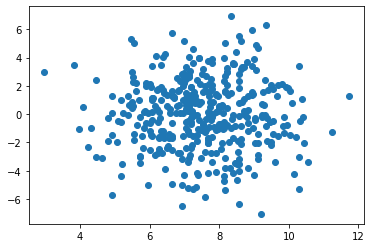

In [ ]:
plt.scatter(y_predict, y_predict-y)

In [ ]:
summary(X,y, y_predict, lr)

RMSE =  2.460119134208168
R2 Score =  0.23926288842678567
Adjusted R2 = 0.23543045965311715
   Coefficients  Standard Errors  t values  Probabilities
0       13.0308            0.631    20.652       0.000000
1       -0.0545            0.005   -10.416       0.000000
2        1.1996            0.258     4.641       0.000005
95 per intervals
   LowerBound  UpperBound
0     11.7688     14.2928
1     -0.0645     -0.0445
2      0.6836      1.7156


#Q10 solutions

b)Price has negatice relation with target, US (yes) has positive relation, Urban is statistically insignificant 

c) Sales = 13.04 -0.05Price  -0.02Urban(Yes =1) + 1.20US(Yes =1)

d) We cannot reject null hypothesis for Urban

f) There is not much difference in model a and e

